# What is the problem?
Predict the survival of passengers on the Titanic, a classic binary classification problem. The objective is to model the probability that a passenger survived based on various features.

# What is the type of machine learning?
The approach used is supervised learning because the model is trained using a dataset that includes both the input features (predictors) and the output label (the target variable 'Survived'). Specifically, the technique applied is logistic regression, which is used for binary classification tasks.

# What are the feature variables and target variables?
## Target Variable: 'Survived'
  This is what the model is trying to predict: whether a passenger survived (1) or did not survive (0
## Feature Variables:
'Travel_Class', 'Sex', 'Age', 'NumSiblings_Spouses',
       'NumParents_Children', 'Embarked').

In [1400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1401]:
df = pd.read_csv('../Dataset/titanic2.csv')
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [1402]:
df.shape

(1310, 8)

In [1403]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [1404]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [1405]:
df.isna().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64

In [1406]:
for column in df:
    print(df[column].value_counts())

pclass
3.0    709
1.0    323
2.0    277
Name: count, dtype: int64
survived
0.0    809
1.0    500
Name: count, dtype: int64
sex
male      843
female    466
Name: count, dtype: int64
age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64
sibsp
0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: count, dtype: int64
parch
0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: count, dtype: int64
fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: count, Length: 281, dtype: int64
embarked
S    914
C    270
Q    123
Name: count, dtype: int64


In [1407]:
df = df.dropna(axis=0)
df.shape

(1043, 8)

In [1408]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [1409]:
# Shuffle the DataFrame
df.sample(frac=1).reset_index(drop=True, inplace=True)
df.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S


In [1410]:
df[df.isna().any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,fare,embarked


In [1411]:
df.dtypes

pclass      float64
survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
embarked     object
dtype: object

In [1412]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [1413]:
df[['pclass', 'survived', 'age', 'sibsp', 'parch']] = df[['pclass', 'survived', 'age', 'sibsp', 'parch']].astype('int')

In [1414]:
df['survived'].value_counts()

survived
0    618
1    425
Name: count, dtype: int64

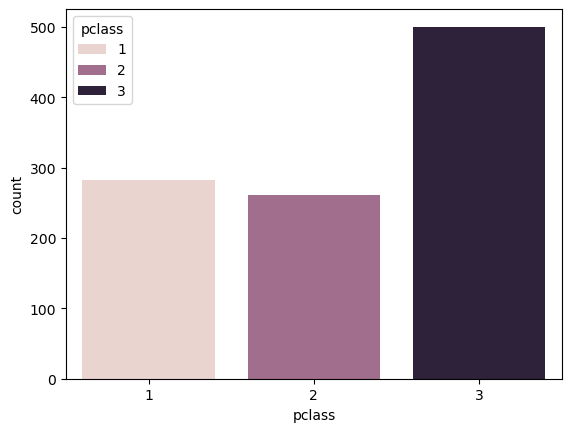

In [1415]:
sns.countplot(data=df, x='pclass', hue='pclass')
plt.show()

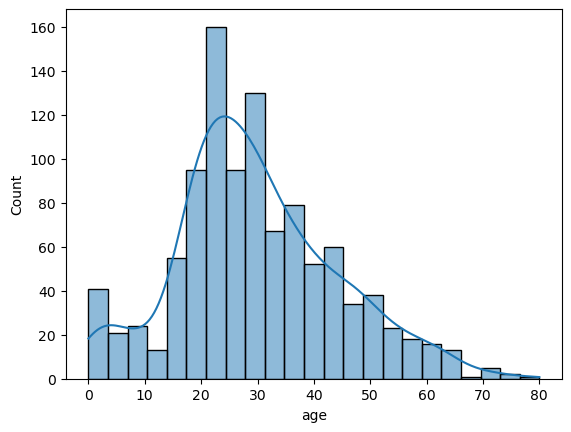

In [1416]:
sns.histplot(data=df, x='age', kde=True)
plt.show()

In [1417]:
df[df.duplicated()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
185,1,0,male,42,0,0,26.5500,S
243,1,0,male,46,0,0,79.2000,C
255,1,1,female,24,0,0,69.3000,C
321,1,0,male,62,0,0,26.5500,S
331,2,0,male,18,0,0,11.5000,S
...,...,...,...,...,...,...,...,...
1271,3,0,male,28,0,0,9.5000,S
1277,3,1,male,22,0,0,7.2250,C
1278,3,0,male,20,0,0,7.8542,S
1280,3,0,male,22,0,0,7.8958,S


In [1418]:
df['sex'] = df['sex'].replace(['male', 'female'], [1, 0])

C:\Users\x-ibah\AppData\Local\Temp\ipykernel_16008\204433013.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(['male', 'female'], [1, 0])


In [1419]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,survived
0,1,0,29,0,0,1
1,1,1,0,1,2,1
2,1,0,2,1,2,0
3,1,1,30,1,2,0
4,1,0,25,1,2,0


In [1420]:
df.to_csv('cleaned_df.csv', index=False)
pd.read_csv('cleaned_df.csv').head()

,pclass,sex,age,sibsp,parch,survived
0,1,0,29,0,0,1
1,1,1,0,1,2,1
2,1,0,2,1,2,0
3,1,1,30,1,2,0
4,1,0,25,1,2,0


In [1421]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [1422]:
y = df['survived']
X = df.drop('survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [1423]:
# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=14)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182


In [1424]:

def survived(model, pclass=3, sex=1, age=33, sibsp=1, parch=4):
    # # Feature names (should match training feature names)
#     feature_names = ['pclass', 'sex', 'age', 'sibsp', 'parch']

# # Create input data for prediction
#     x = pd.DataFrame(np.array([[3, 1, 36, 0, 0]]), columns=feature_names)
    x = np.array([[pclass, sex, age, sibsp, parch]]).reshape(1, -1)

    # Apply preprocessing (e.g., scaling)
    x = scaler.transform(x)
    
    # Make predictions
    prediction = model.predict(x)
    probability = model.predict_proba(x)
    
    # Determine the outcome
    if prediction[0] == 0:
        result = "Did not survive"
    else:
        result = "Survived"
    
    # Print the result and probabilities
    print(f"Prediction: {result}")
    print(f"Survival Probability: {probability[0][1]:.2f}")
    print(f"Non-Survival Probability: {probability[0][0]:.2f}")


In [1427]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'survived'], dtype='object')

In [1442]:
for x in df[['pclass', 'sex', 'sibsp', 'parch']]:
    print(f'{x.upper()}: {list(df[x].unique())}')

print(f'Min Age:{df.age.min()} Max Age: {df.age.max()}')

PCLASS: [1, 2, 3]
SEX: [0, 1]
SIBSP: [0, 1, 2, 3, 4, 5, 8]
PARCH: [0, 2, 1, 4, 3, 5, 6]
Min Age:0 Max Age: 80


In [1443]:
df.dtypes

pclass      int32
sex         int64
age         int32
sibsp       int32
parch       int32
survived    int32
dtype: object

In [1445]:
# Gather user input
pclass = int(input("Enter passenger class (1 = First, 2 = Second, 3 = Third): "))
sex = int(input("Enter sex (1 = Male, 0 = Female): "))
age = int(input("Enter age (0 to 80): "))
sibsp = int(input("Enter number of siblings/spouses aboard (0 to 8): "))
parch = int(input("Enter number of parents/children aboard (0 to 6): "))

# Validate input ranges
if not (1 <= pclass <= 3):
    raise ValueError("Passenger class must be between 1 and 3.")
if sex not in [0, 1]:
    raise ValueError("Sex must be 0 (Female) or 1 (Male).")
if not (0 <= age <= 80):
    raise ValueError("Age must be between 0 and 80.")
if not (0 <= sibsp <= 8):
    raise ValueError("Number of siblings/spouses must be between 0 and 8.")
if not (0 <= parch <= 6):
    raise ValueError("Number of parents/children must be between 0 and 6.")

# Call the function with specific inputs
survived(model, pclass, sex, age, sibsp, parch)